# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


In [7]:
cities

['port augusta',
 'mattru',
 'bracebridge',
 'ushuaia',
 'crixas',
 'dikson',
 'bluff',
 'mahebourg',
 'iquitos',
 'ponferrada',
 'hilo',
 'attawapiskat',
 'ilulissat',
 'busselton',
 'qaanaaq',
 'rikitea',
 'barrow',
 'puerto ayora',
 'salalah',
 'souillac',
 'chodavaram',
 'brae',
 'manta',
 'jamestown',
 'nome',
 'east london',
 'mataura',
 'kapaa',
 'burkhala',
 'amazar',
 'pisco',
 'atuona',
 'norman wells',
 'georgetown',
 'thompson',
 'san patricio',
 'poum',
 'mangrol',
 'hobart',
 'novo aripuana',
 'hermanus',
 'victor harbor',
 'yinchuan',
 'aklavik',
 'yellowknife',
 'faya',
 'lebu',
 'muscat',
 'faanui',
 'punta arenas',
 'bredasdorp',
 'chuy',
 'saint george',
 'kidal',
 'esperance',
 'aldan',
 'talara',
 'lewistown',
 'illoqqortoormiut',
 'kelvington',
 'saint-francois',
 'dunedin',
 'butaritari',
 'korla',
 'inuvik',
 'amderma',
 'marrakesh',
 'oranjestad',
 'honiara',
 'ballina',
 'sao joao da barra',
 'saskylakh',
 'severo-kurilsk',
 'cherskiy',
 'salinas',
 'pacific g

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}?q={city}&appid={weather_api_key}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data=json.loads(city_weather.text)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]['lat']
        city_lng = data["coord"]['lon']
        city_max_temp = data["main"]['temp_max']
        city_humidity = data["main"]['humidity']
        city_clouds = data["clouds"]['all']
        city_wind = data["wind"]['speed']
        city_country = data["sys"]['country']
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port augusta
Processing Record 2 of Set 1 | mattru
Processing Record 3 of Set 1 | bracebridge
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | crixas
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | iquitos
Processing Record 10 of Set 1 | ponferrada
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | chodavaram
Processing Record 22 of Set 1 | brae
Processing Record 23 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port augusta,-32.5000,137.7667,291.41,43,40,2.91,AU,1681150744
1,mattru,7.6244,-11.8332,300.71,80,96,2.29,SL,1681150744
2,bracebridge,45.0334,-79.3163,290.42,29,0,4.12,CA,1681150624
3,ushuaia,-54.8000,-68.3000,279.96,65,75,2.57,AR,1681150495
4,crixas,-14.5489,-49.9692,299.51,73,99,1.16,BR,1681150745


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port augusta,-32.5000,137.7667,291.41,43,40,2.91,AU,1681150744
1,mattru,7.6244,-11.8332,300.71,80,96,2.29,SL,1681150744
2,bracebridge,45.0334,-79.3163,290.42,29,0,4.12,CA,1681150624
3,ushuaia,-54.8000,-68.3000,279.96,65,75,2.57,AR,1681150495
4,crixas,-14.5489,-49.9692,299.51,73,99,1.16,BR,1681150745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

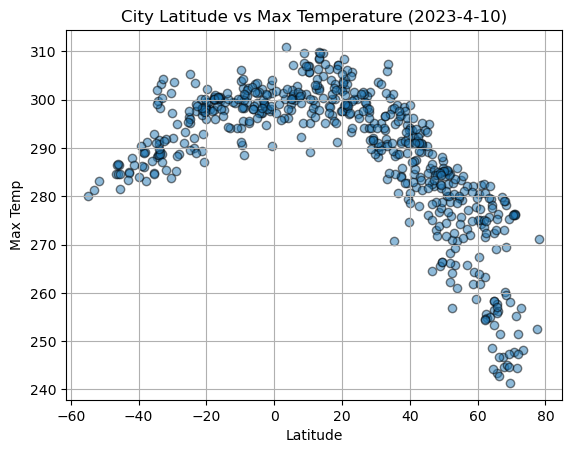

In [29]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()

data_x = city_data_df.groupby('City').mean()['Lat']
data_y = city_data_df.groupby('City').mean()['Max Temp']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_x, data_y, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")
ax.set_title("City Latitude vs Max Temperature (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

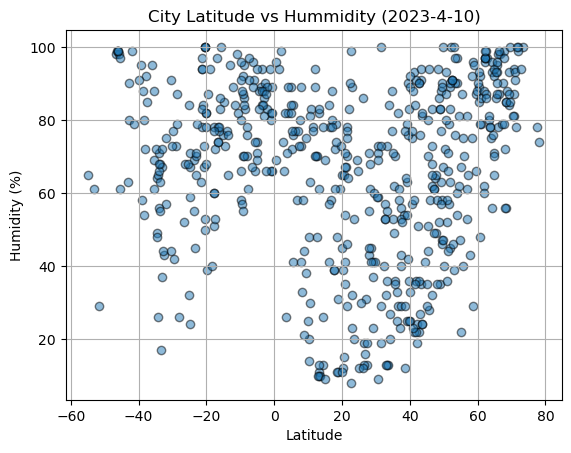

In [34]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()

data_a = city_data_df.groupby('City').mean()['Lat']
data_b = city_data_df.groupby('City').mean()['Humidity']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_a, data_b, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs Hummidity (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

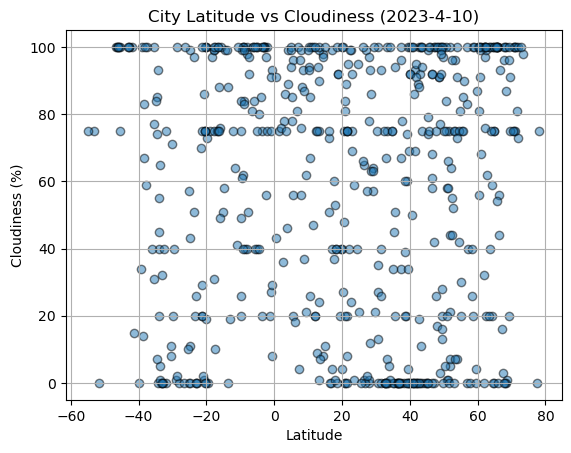

In [38]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()

data_c = city_data_df.groupby('City').mean()['Lat']
data_d = city_data_df.groupby('City').mean()['Cloudiness']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_c, data_d, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs Cloudiness (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

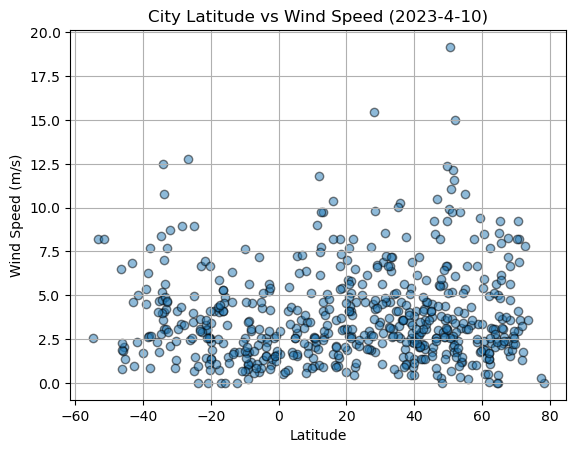

In [39]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()

data_e = city_data_df.groupby('City').mean()['Lat']
data_f = city_data_df.groupby('City').mean()['Wind Speed']

# Incorporate the other graph properties
for color in ['tab:blue']:
    ax.scatter(data_e, data_f, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("City Latitude vs Wind Speed (2023-4-10)")
ax.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
# Build scatter plot for latitude vs. temperature

def linear_reg(x,y,data_f):

    fig, ax = plt.subplots()

    data_x = data_f.groupby('City').mean()[x]
    data_y = data_f.groupby('City').mean()[y]

# Incorporate the other graph properties
    for color in ['tab:blue']:
         ax.scatter(data_x, data_y, c=color, label="Set 1",
               alpha=0.5, edgecolors='black')
    
    # Fit a linear trendline to the data
    z = np.polyfit(data_x, data_y, 1)
    p = np.poly1d(z)
    ax.plot(data_x, p(data_x), c="red", linewidth=2)

    # Add the y=mx+b equation to the plot
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)

    r_value = st.pearsonr(data_y, data_x)
    print(f'the R Value is {round(r_value[0],2)}')

# Show plot
plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mattru,7.6244,-11.8332,300.71,80,96,2.29,SL,1681150744
2,bracebridge,45.0334,-79.3163,290.42,29,0,4.12,CA,1681150624
5,dikson,73.5069,80.5464,248.22,100,98,3.60,RU,1681150746
9,ponferrada,42.5466,-6.5962,292.29,51,89,4.92,ES,1681150748
10,hilo,19.7297,-155.0900,297.66,73,40,2.06,US,1681150748


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port augusta,-32.5000,137.7667,291.41,43,40,2.91,AU,1681150744
3,ushuaia,-54.8000,-68.3000,279.96,65,75,2.57,AR,1681150495
4,crixas,-14.5489,-49.9692,299.51,73,99,1.16,BR,1681150745
6,bluff,-46.6000,168.3333,284.71,98,100,6.50,NZ,1681150746
7,mahebourg,-20.4081,57.7000,298.29,100,75,2.57,MU,1681150747


###  Temperature vs. Latitude Linear Regression Plot

the R Value is -0.85


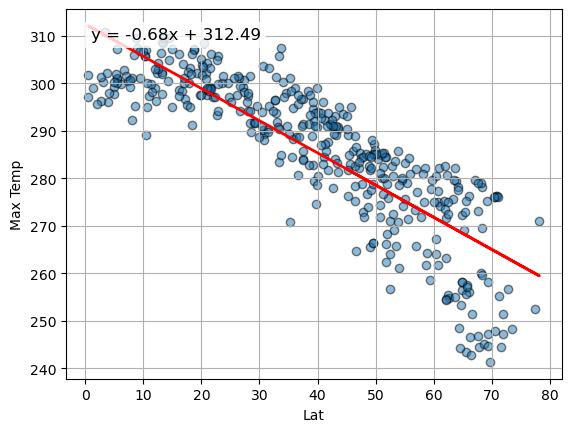

In [75]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
linear_reg("Lat","Max Temp",northern_hemi_df)

the R Value is 0.71


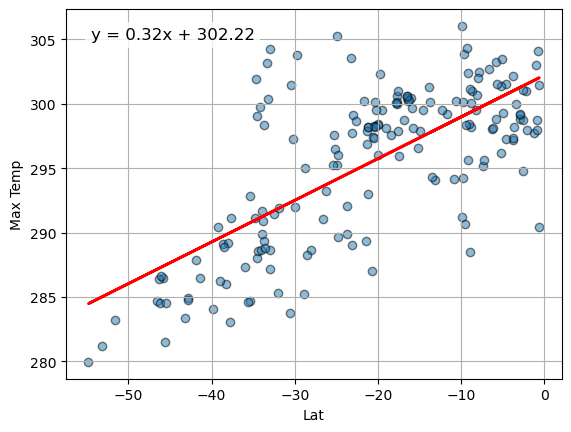

In [76]:
# Linear regression on Southern Hemisphere
linear_reg("Lat","Max Temp",southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the R Value is 0.36


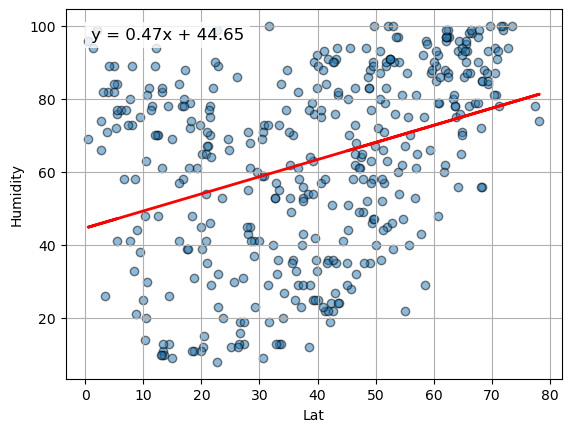

In [77]:
# Northern Hemisphere
linear_reg("Lat","Humidity",northern_hemi_df)

the R Value is 0.23


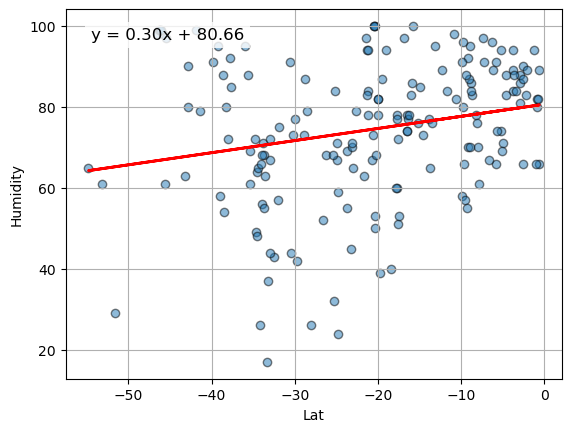

In [78]:
# Southern Hemisphere
linear_reg("Lat","Humidity",southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the R Value is 0.06


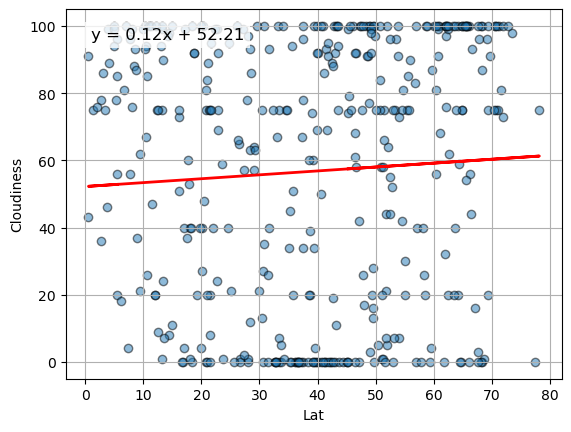

In [79]:
# Northern Hemisphere
linear_reg("Lat","Cloudiness",northern_hemi_df)

the R Value is 0.17


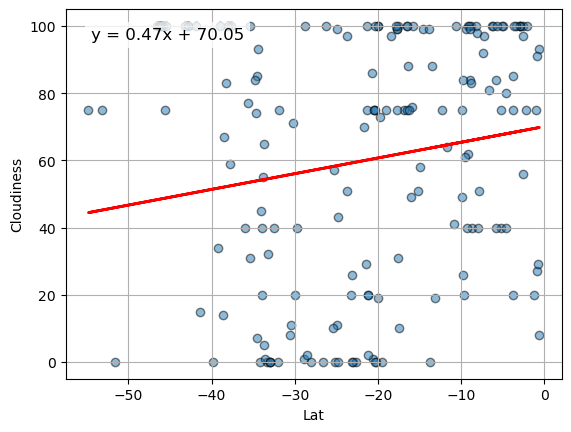

In [80]:
# Southern Hemisphere
linear_reg("Lat","Cloudiness",southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the R Value is 0.02


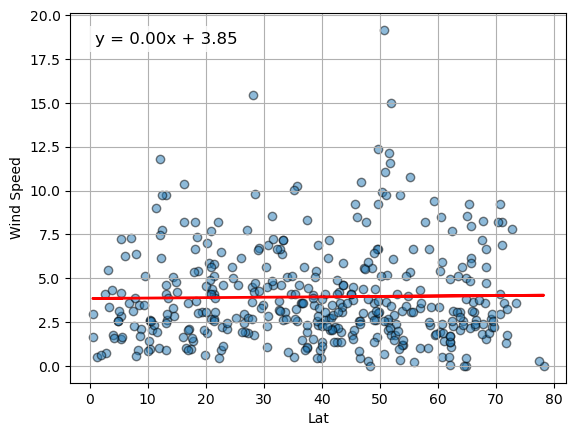

In [81]:
# Northern Hemisphere
linear_reg("Lat","Wind Speed",northern_hemi_df)

the R Value is -0.29


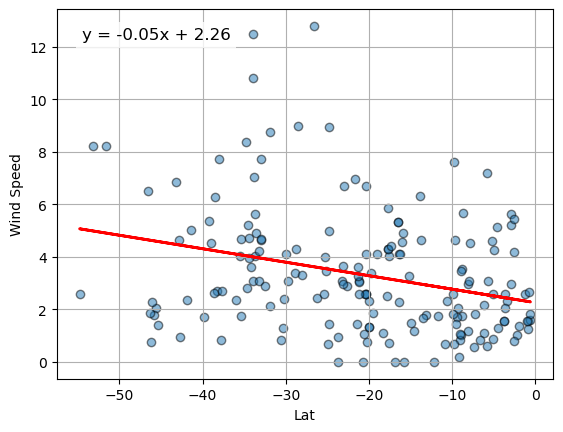

In [82]:
# Southern Hemisphere
linear_reg("Lat","Wind Speed",southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE